In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Load the training dataset
train_data = pd.read_csv("fraudTrain.csv")

# Load the test dataset
test_data = pd.read_csv("fraudTest.csv")


In [6]:
# Drop unnecessary columns (like 'trans_date_trans_time', 'cc_num', etc.)
drop_columns = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'gender',
                'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'dob', 'trans_num', 'unix_time',
                'merch_lat', 'merch_long']
train_data = train_data.drop(drop_columns, axis=1)
test_data = test_data.drop(drop_columns, axis=1)

# Separate target variable
train_labels = train_data['is_fraud']
test_labels = test_data['is_fraud']

train_data = train_data.drop('is_fraud', axis=1)
test_data = test_data.drop('is_fraud', axis=1)


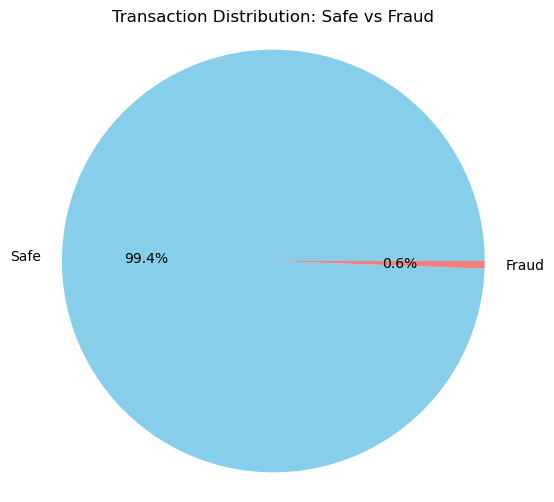

In [26]:
# Create a pie chart
fraud_count = test_labels.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_count, labels=['Safe', 'Fraud'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Transaction Distribution: Safe vs Fraud")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [7]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(train_data, train_labels)

RandomForestClassifier(random_state=42)

In [11]:
# Predict on the test data
predictions = clf.predict(test_data)

# Calculate accuracy
accuracy = round(accuracy_score(test_labels, predictions)*100,2)
print("Accuracy:", accuracy)

# Get classification report with precision, recall, and F1-score
report = classification_report(test_labels, predictions)
print("Classification Report:\n", report)

Accuracy: 99.6
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.44      0.15      0.23      2145

    accuracy                           1.00    555719
   macro avg       0.72      0.58      0.61    555719
weighted avg       0.99      1.00      0.99    555719

